In [36]:
import pandas as pd 
import matplotlib.pyplot as plt 


weatherData=pd.read_csv('weather.csv')

weatherData.head()


,Year,Month,City,Temperature,Humidity,Wind Speed,Rainfall
0,2021,7,Karaj,-9.0,73.0,12.3,0.0
1,2022,2,Isfahan,13.0,78.0,12.8,0.0
2,2021,9,Shiraz,-1.6,51.0,12.5,0.0
3,2023,12,Hamedan,43.6,39.0,9.8,0.0
4,2023,12,Kermanshah,39.4,55.0,13.0,0.0


In [37]:
weatherData.shape


(150000, 7)

In [38]:
weatherData

,Year,Month,City,Temperature,Humidity,Wind Speed,Rainfall
0,2021,7,Karaj,-9.0,73.0,12.3,0.0
1,2022,2,Isfahan,13.0,78.0,12.8,0.0
2,2021,9,Shiraz,-1.6,51.0,12.5,0.0
3,2023,12,Hamedan,43.6,39.0,9.8,0.0
4,2023,12,Kermanshah,39.4,55.0,13.0,0.0
...,...,...,...,...,...,...,...
149995,2023,10,Qom,11.5,28.0,11.9,0.0
149996,2022,6,Kermanshah,20.4,21.0,22.9,0.0
149997,2021,9,Ardabil,13.7,35.0,20.6,0.0
149998,2021,10,Karaj,-10.4,24.0,14.0,0.0


In [39]:
weatherData.describe()

,Year,Month,Temperature,Humidity,Wind Speed,Rainfall
count,150000.000000,150000.000000,148720.000000,147490.000000,146505.000000,143743.000000
mean,2022.001047,6.505400,15.031170,54.976642,12.475192,10.045106
std,0.817115,3.459799,17.331648,26.243239,7.230129,23.879449
min,2021.000000,1.000000,-15.000000,10.000000,0.000000,0.000000
25%,2021.000000,3.000000,-0.000000,32.000000,6.200000,0.000000
50%,2022.000000,7.000000,15.000000,55.000000,12.500000,0.000000
75%,2023.000000,10.000000,30.100000,78.000000,18.800000,0.000000
max,2023.000000,12.000000,45.000000,100.000000,25.000000,100.000000


In [40]:
weatherData['City'].value_counts()

City
Hamedan       10001
Tabriz         9958
Sanandaj       9906
Karaj          9884
Qom            9878
Kermanshah     9874
Isfahan        9842
Mashhad        9836
Ardabil        9833
Yazd           9805
Rasht          9779
Tehran         9763
Ahvaz          9728
Urmia          9703
Shiraz         9700
Name: count, dtype: int64

In [41]:
weatherData.isna().any()

Year           False
Month          False
City            True
Temperature     True
Humidity        True
Wind Speed      True
Rainfall        True
dtype: bool

In [42]:
weatherData.isna().sum()

Year              0
Month             0
City           2510
Temperature    1280
Humidity       2510
Wind Speed     3495
Rainfall       6257
dtype: int64

In [43]:
weatherData.isna().sum().sum()

16052

In [45]:
weatherData['City']=weatherData['City'].fillna('UnKnown')

In [46]:
weatherData.isna().sum()

Year              0
Month             0
City              0
Temperature    1280
Humidity       2510
Wind Speed     3495
Rainfall       6257
dtype: int64

In [47]:
weatherData.isna().sum().sum()

13542

In [48]:
weather_data_clean=weatherData.dropna(subset=['Temperature','Humidity','Rainfall'])

In [49]:
weather_data_clean.isna().sum()

Year              0
Month             0
City              0
Temperature       0
Humidity          0
Wind Speed     3278
Rainfall          0
dtype: int64

In [50]:
weather_data_clean.isna().sum().sum()

3278

In [51]:
Rainfall_Mean=weather_data_clean.groupby('City')['Rainfall'].mean().sort_values(ascending=False)
Rainfall_Mean

City
Qom           10.317962
Urmia         10.306699
Tabriz        10.277582
Ahvaz         10.253507
Mashhad       10.188598
Kermanshah    10.084150
Tehran        10.060142
Shiraz        10.011263
Karaj          9.996750
Sanandaj       9.976036
Yazd           9.955178
Isfahan        9.869164
Rasht          9.866663
Ardabil        9.688473
Hamedan        9.607857
Name: Rainfall, dtype: float64

In [52]:
Rainfall_Mean=weather_data_clean.groupby('City')['Rainfall'].mean().sort_values(ascending=True)
Rainfall_Mean

City
Hamedan        9.607857
Ardabil        9.688473
Rasht          9.866663
Isfahan        9.869164
Yazd           9.955178
Sanandaj       9.976036
Karaj          9.996750
Shiraz        10.011263
Tehran        10.060142
Kermanshah    10.084150
Mashhad       10.188598
Ahvaz         10.253507
Tabriz        10.277582
Urmia         10.306699
Qom           10.317962
Name: Rainfall, dtype: float64

In [53]:
Rainfall_Mean=weather_data_clean.groupby('City')['Rainfall'].mean().sort_values(ascending=False)[:5]
Rainfall_Mean

City
Qom        10.317962
Urmia      10.306699
Tabriz     10.277582
Ahvaz      10.253507
Mashhad    10.188598
Name: Rainfall, dtype: float64

In [54]:
Rainfall_Mean=weather_data_clean.groupby('City')['Rainfall'].mean().sort_values(ascending=True)[:5]
Rainfall_Mean

City
Hamedan    9.607857
Ardabil    9.688473
Rasht      9.866663
Isfahan    9.869164
Yazd       9.955178
Name: Rainfall, dtype: float64

In [55]:
weather_data_clean.groupby('Month')['Rainfall'].max()

Month
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6      99.9
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
Name: Rainfall, dtype: float64

In [56]:
weather_data_clean.groupby('Month')['Rainfall'].min()

Month
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
Name: Rainfall, dtype: float64

In [61]:
rainfall_stats=weather_data_clean.groupby(['Year','Month'])['Rainfall'].max()
rainfall_stats


Year  Month
2021  1         99.1
      2        100.0
      3        100.0
      4        100.0
      5         99.7
      6         99.9
      7         99.6
      8        100.0
      9        100.0
      10        99.9
      11        99.4
      12        99.8
2022  1        100.0
      2         99.7
      3         99.9
      4         99.8
      5         99.8
      6         99.9
      7        100.0
      8         99.9
      9         99.9
      10        99.7
      11        99.9
      12       100.0
2023  1        100.0
      2        100.0
      3         99.9
      4        100.0
      5        100.0
      6         99.9
      7         99.9
      8         99.6
      9         99.9
      10       100.0
      11       100.0
      12        99.9
Name: Rainfall, dtype: float64

In [62]:
rainfall_stats=weather_data_clean.groupby(['Year','Month'])['Rainfall'].min()
rainfall_stats

Year  Month
2021  1        0.0
      2        0.0
      3        0.0
      4        0.0
      5        0.0
      6        0.0
      7        0.0
      8        0.0
      9        0.0
      10       0.0
      11       0.0
      12       0.0
2022  1        0.0
      2        0.0
      3        0.0
      4        0.0
      5        0.0
      6        0.0
      7        0.0
      8        0.0
      9        0.0
      10       0.0
      11       0.0
      12       0.0
2023  1        0.0
      2        0.0
      3        0.0
      4        0.0
      5        0.0
      6        0.0
      7        0.0
      8        0.0
      9        0.0
      10       0.0
      11       0.0
      12       0.0
Name: Rainfall, dtype: float64

In [65]:
rainfall_stats=weather_data_clean.groupby(['Year','Month']).aggregate(Rainfall_min=('Rainfall','min'),Rainfall_max=('Rainfall','max'))
rainfall_stats

Rainfall_min  Rainfall_max
Year Month                            
2021 1               0.0          99.1
     2               0.0         100.0
     3               0.0         100.0
     4               0.0         100.0
     5               0.0          99.7
     6               0.0          99.9
     7               0.0          99.6
     8               0.0         100.0
     9               0.0         100.0
     10              0.0          99.9
     11              0.0          99.4
     12              0.0          99.8
2022 1               0.0         100.0
     2               0.0          99.7
     3               0.0          99.9
     4               0.0          99.8
     5               0.0          99.8
     6               0.0          99.9
     7               0.0         100.0
     8               0.0          99.9
     9               0.0          99.9
     10              0.0          99.7
     11              0.0          99.9
     12              0.0         100.0
2023 1               0.0         100.0
     2               0.0         100.0
     3               0.0          99.9
     4               0.0         100.0
     5               0.0         100.0
     6               0.0          99.9
     7               0.0          99.9
     8               0.0          99.6
     9               0.0          99.9
     10              0.0         100.0
     11              0.0         100.0
     12              0.0          99.9

In [89]:
grouped = weather_data_clean.groupby(['City','Year','Month'])['Temperature'].mean()[:50]


In [90]:
grouped

City     Year  Month
Ahvaz    2021  1        15.759924
               2        16.925292
               3        14.922182
               4        15.258594
               5        17.934926
               6        13.718504
               7        14.562500
               8        14.664981
               9        17.139749
               10       14.453252
               11       15.296538
               12       16.070769
         2022  1        13.893307
               2        14.823358
               3        15.042188
               4        15.505929
               5        14.386590
               6        15.143182
               7        16.698367
               8        13.468016
               9        14.583333
               10       15.300000
               11       15.059004
               12       15.166058
         2023  1        15.269960
               2        14.987190
               3        14.440161
               4        15.129268
               5        15.

In [97]:
tehran_2022_data=weather_data_clean[(weather_data_clean['City']=='Tehran') & (weather_data_clean['Year']==2022)]
tehran_2022_data

,Year,Month,City,Temperature,Humidity,Wind Speed,Rainfall
41,2022,6,Tehran,19.5,34.0,6.5,0.0
48,2022,8,Tehran,41.1,58.0,21.6,0.0
50,2022,7,Tehran,6.3,54.0,20.9,40.6
141,2022,10,Tehran,39.4,100.0,18.4,99.6
188,2022,12,Tehran,19.7,60.0,6.5,0.0
...,...,...,...,...,...,...,...
149845,2022,7,Tehran,7.8,64.0,6.3,0.0
149936,2022,11,Tehran,0.7,77.0,20.3,0.0
149937,2022,1,Tehran,-3.3,72.0,16.9,0.0
149946,2022,7,Tehran,-3.2,98.0,6.9,35.3


In [98]:
monthly_avg_temps=tehran_2022_data.groupby('Month')['Temperature'].mean()
monthly_avg_temps


Month
1     16.256923
2     13.669318
3     16.424291
4     15.031061
5     14.833469
6     13.836398
7     13.704651
8     13.493676
9     17.204721
10    14.727386
11    14.059761
12    16.771756
Name: Temperature, dtype: float64

In [105]:
def month_to_season(month):

    if month in [1,2,3]:
     return 'Spring'
    elif  month in [4,5,6]:
     return 'Summer'
    elif  month in [7,8,9]:
     return 'Autumn'
    elif  month in [10,11,12]:
     return 'Winter'

weather_data_clean['Season']=weather_data_clean['Month'].apply(month_to_season)
seasonal_averages=weather_data_clean.groupby('Season')[['Temperature','Humidity','Rainfall']].mean()
seasonal_averages


/var/folders/t4/hq0wsdy52cn8hw6l92l0zycr0000gn/T/ipykernel_94159/3045615742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_clean['Season']=weather_data_clean['Month'].apply(month_to_season)


,Temperature,Humidity,Rainfall
Season,,,
Autumn,15.034776,54.893786,9.902591
Spring,15.016608,54.847363,10.113409
Summer,15.031661,55.116208,9.915954
Winter,15.027868,55.011160,10.187409


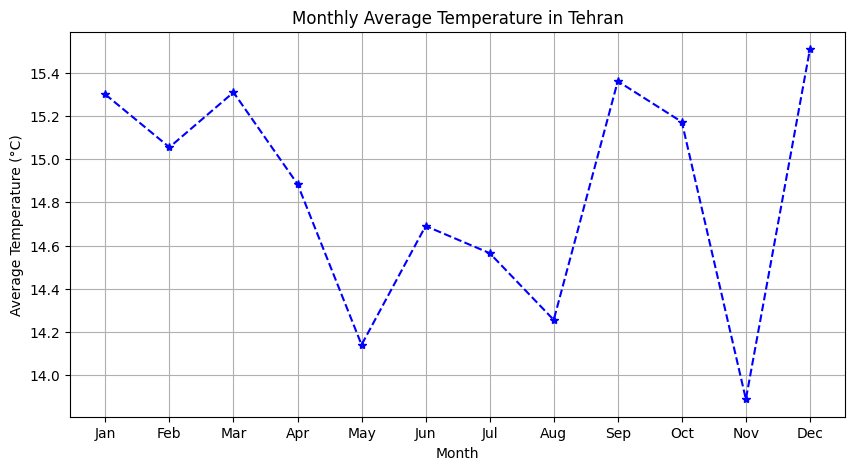

In [117]:
tehran_data=weather_data_clean[weather_data_clean['City']=='Tehran']
monthly_avg_temperature=tehran_data.groupby('Month')['Temperature'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_temperature.index, monthly_avg_temperature.values, marker='*', linestyle='--', color='b')
plt.title('Monthly Average Temperature in Tehran')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(monthly_avg_temperature.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Month
1     15.299214
2     15.054839
3     15.309067
4     14.884542
5     14.140808
6     14.690564
7     14.564910
8     14.256016
9     15.360686
10    15.172123
11    13.888834
12    15.508614
Name: Temperature, dtype: float64